In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
#List of the symptoms is listed here in list l1.
l1=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
    'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
    'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
    'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
    'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
    'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
    'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
    'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
    'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
    'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
    'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
    'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
    'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
    'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
    'yellow_crust_ooze']
# Total number of symptoms
print(len(l1))

#List of Diseases is listed in list disease.
disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']
# Total number of diseases
print(len(disease))

95
41


In [3]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
#Reading the training .csv file
df = pd.read_csv("dataset.csv")
dff = pd.read_csv("dataset.csv", index_col='prognosis')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 42.7+ KB


In [51]:
print("df: ",df.shape)
print("dff: ",dff.shape)

df:  (41, 133)
dff:  (41, 132)


In [52]:
print("df : ",df.columns)
print("dff : ", dff.columns)

df :  Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
dff :  Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)


In [53]:
#Label encoding the disease column
dff.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)

In [54]:
dff.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GERD,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Chronic cholestasis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drug Reaction,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Data Visualization

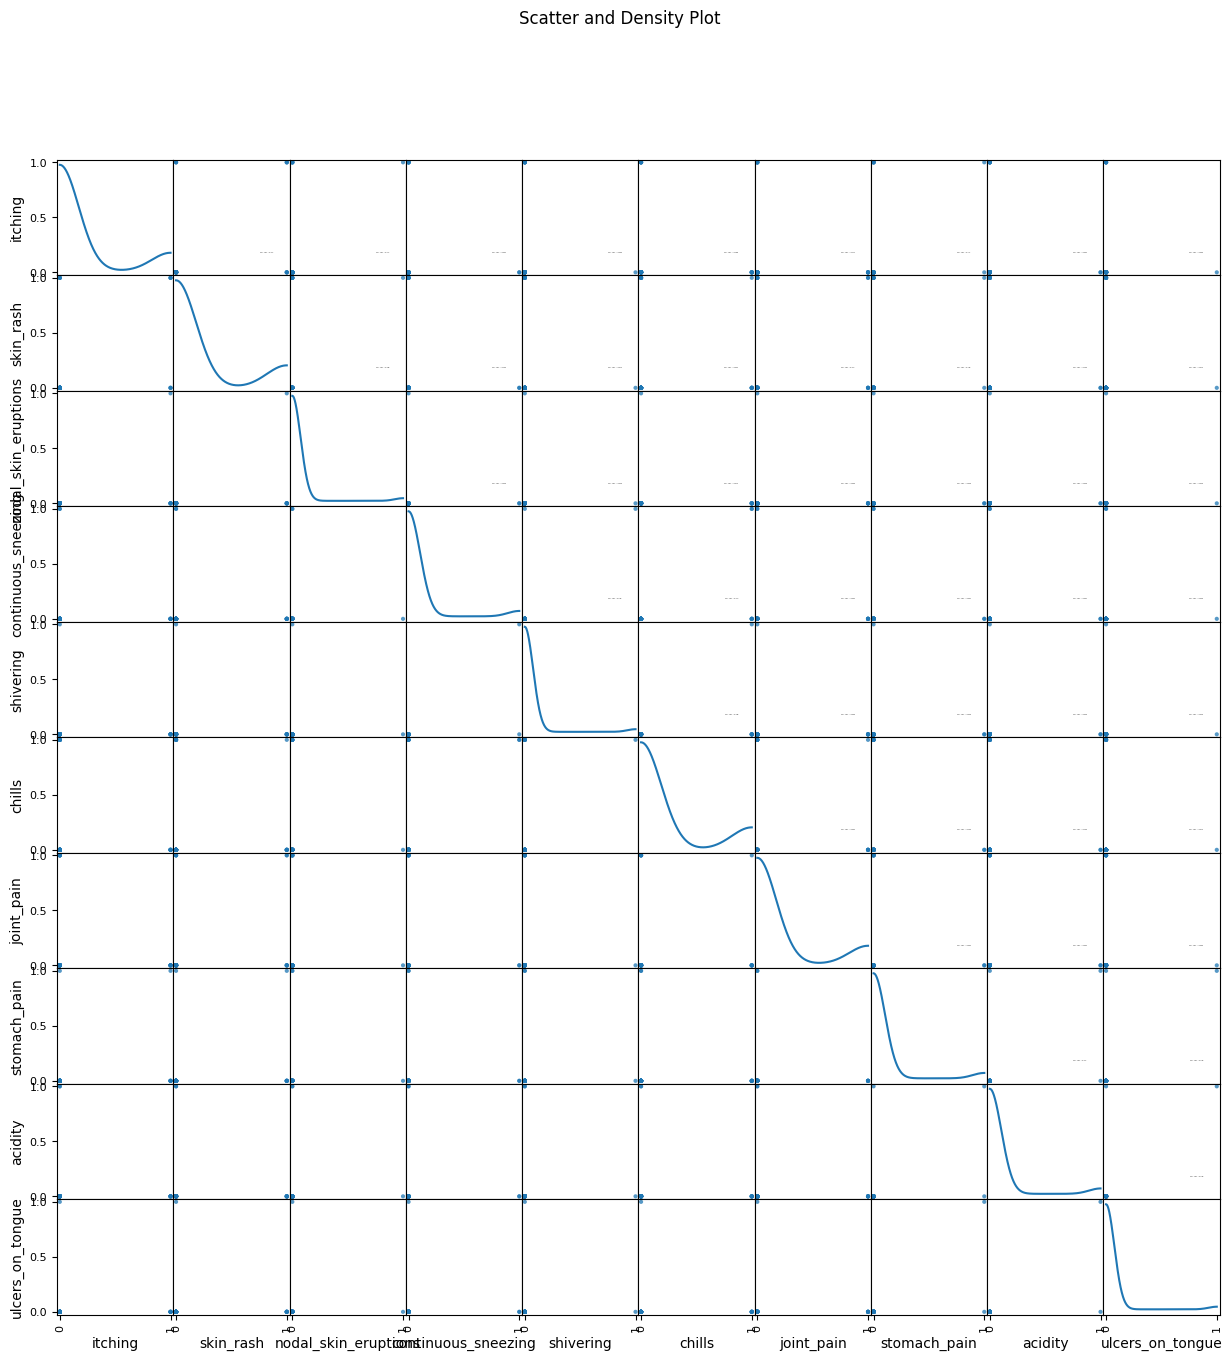

In [9]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna(axis='columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df, 15, 0.5)

In [10]:
x= df[l1]
y = df[["prognosis"]]
np.ravel(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

## Decision Tree Training

this is done to separate the target variable from the rest of the dataset. X is the features and Y is the target variable.

In [83]:
X = df[l1] #features
y = df[["prognosis"]] #targetvariable
print(y.head())
print()
print (X.head())

             prognosis
0     Fungal infection
1              Allergy
2                 GERD
3  Chronic cholestasis
4        Drug Reaction

   back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0          0             0               0          0           0   
1          0             0               0          0           0   
2          0             0               0          0           0   
3          0             0               1          0           0   
4          0             0               0          0           0   

   yellow_urine  yellowing_of_eyes  acute_liver_failure  fluid_overload  \
0             0                  0                    0               0   
1             0                  0                    0               0   
2             0                  0                    0               0   
3             0                  1                    0               0   
4             0                  0                    0               0

In [57]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Training and testing dataset split

In [84]:
print(X.shape)
print(y.shape)

(41, 95)
(41, 1)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27, 95)
(27, 1)
(14, 95)
(14, 1)


In [96]:
# Function to train the Decision Tree model
def train_decision_tree(x, y):
  clf = tree.DecisionTreeClassifier(criterion="gini")
  clf.fit(x, y)
  return clf

clf= train_decision_tree(X, y)

Testing the model's accuracy

In [78]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [99]:
y_pred=clf.predict(X_test)
print(y_pred)
print(y_test)
print("Decision Tree")
print("Accuracy")
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

['Acne' 'Migraine' 'Allergy' 'Fungal infection'
 '(vertigo) Paroymsal  Positional Vertigo' 'Pneumonia' 'Gastroenteritis'
 'Peptic ulcer diseae' 'Cervical spondylosis' 'Diabetes ' 'Hypertension '
 'Jaundice' 'Drug Reaction' 'hepatitis A']
                                  prognosis
37                                     Acne
11                                 Migraine
1                                   Allergy
0                          Fungal infection
36  (vertigo) Paroymsal  Positional Vertigo
27                                Pneumonia
8                           Gastroenteritis
5                       Peptic ulcer diseae
12                     Cervical spondylosis
7                                 Diabetes 
10                            Hypertension 
14                                 Jaundice
4                             Drug Reaction
19                              hepatitis A
Decision Tree
Accuracy
1.0
14.0
Confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 

In [109]:
# # Function to predict disease based on symptoms
# def predict_disease(clf, symptoms):
#     l2 = [1 if symptom in symptoms else 0 for symptom in l1]
#     input_test = [l2]
#     predicted = clf.predict(input_test)[0]
#     return disease[predicted] if predicted < len(disease) else "Not Found"


def predict_disease(clf, symptoms):
    # Convert symptoms into a feature vector
    l2 = [1 if symptom in symptoms else 0 for symptom in l1]

    # Ensure input is in the correct format for prediction
    input_test = np.array(l2).reshape(1, -1)  # Reshape to match training data

    # Predict using the trained classifier
    predicted = clf.predict(input_test)[0]

    # Ensure predicted value is handled correctly
    if isinstance(predicted, (int, np.integer)):  # If it’s an index
        return disease[predicted] if predicted < len(disease) else "Not Found"
    elif isinstance(predicted, str):  # If it directly returns the disease name
        return predicted
    else:
        return "Error: Unexpected prediction output"


In [110]:
# Main execution
#clf = train_decision_tree(X, y)

# Taking input from the user
symptoms = []

# Mandatory input for the first two symptoms
for i in range(1, 3):  # Loop for the first two mandatory symptoms
    symptom = input(f"Enter {i} symptom (mandatory): ")
    symptoms.append(symptom)

# Optional input for the next three symptoms
for i in range(3, 6):  # Loop for the next three optional symptoms
    symptom = input(f"Enter {i} symptom (optional, press Enter to skip): ")
    if symptom:  # Only append if the user has entered a symptom
        symptoms.append(symptom)

print(symptoms)
print(type(symptoms))
sy = pd.DataFrame(symptoms)
print(sy)
print(type(sy))
# Predicting the disease
predicted_disease = predict_disease(clf, symptoms)
print(f"The predicted disease is: {predicted_disease}")

Enter 1 symptom (mandatory): itching
Enter 2 symptom (mandatory): skin_rash
Enter 3 symptom (optional, press Enter to skip): nodal_skin_eruptions
Enter 4 symptom (optional, press Enter to skip): 
Enter 5 symptom (optional, press Enter to skip): 
['itching', 'skin_rash', 'nodal_skin_eruptions']
<class 'list'>
                      0
0               itching
1             skin_rash
2  nodal_skin_eruptions
<class 'pandas.core.frame.DataFrame'>
The predicted disease is: Drug Reaction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Saving the trained model

In [114]:
import pickle

In [115]:
filename = "DT_model.sav"
pickle.dump(clf, open(filename, "wb"))

In [117]:
filename = "DT_model.pkl"
pickle.dump(clf, open(filename, "wb"))